In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [5]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)+20*(2*np.pi)**(-0.5)*np.exp(-0.5*(x-5)**2)+np.sin(5*x)+np.tan(5*x+2)

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

X = np.linspace(0.1, 9.9, 50)
X = np.atleast_2d(X).T

y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

In [6]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)
gp.fit(X, y)
X2 = np.atleast_2d(np.linspace(-5.1,14.9,105)).T
y_pred, sigma = gp.predict(X, return_std=True)

<IPython.core.display.Javascript object>


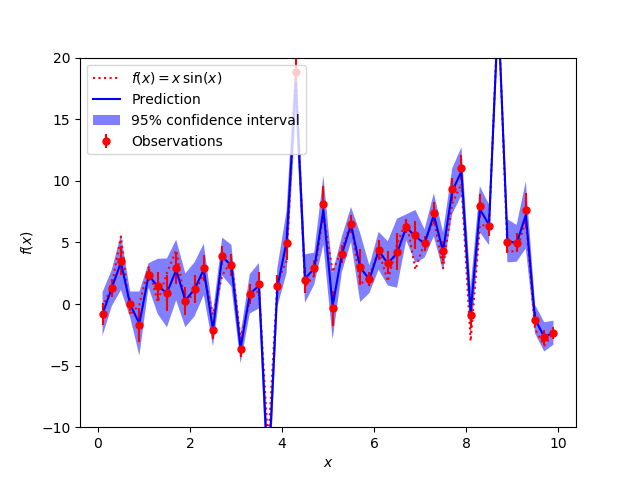

In [8]:
%matplotlib notebook
plt.figure()
plt.plot(X, f(X), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(X, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([X, X[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')